In [1]:
import sys
sys.path.append('../scripts/')
from TriggerUtility import *
from root_pandas import read_root
%matplotlib inline
import matplotlib.colors as colors
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

from itertools import cycle

In [2]:
def root_to_dataframe(path, tree, features, index):
    '''
    Converts a semi-flat root ntuple to a pandas dataframe using root_pandas.

    Parameters:
    ===========
    path : location of input ROOT file
    features : these are the branches to be put into the dataframe.  These
               should be vectors of basic types which will be flattened.
    index : the column to use as the first index (the second index will be
            __array_index that comes out of the root_pandas flattening).
    '''

    df = read_root(path, tree, columns=[index]+features, flatten=features)
    df.index = [df[index], df['__array_index']]
    df = df[features]
    return df

In [3]:
features = ['tc_id', 'tc_zside', 'tc_subdet', 'tc_layer', 'tc_wafer', 'tc_wafertype',
            'tc_eta', 'tc_phi', 'tc_z', 'tc_energy']

In [4]:
geom = read_root("../data/test_triggergeom.root","hgcaltriggergeomtester/TreeTriggerCells")
trig = root_to_dataframe("../data/ntuple.root","hgcalTriggerNtuplizer/HGCalTriggerNtuple", features, index='event')

/home/jamesbueghly/anaconda2/envs/py34root/lib/python3.4/site-packages/root_pandas/readwrite.py:221: UserWarning: Ignored the following non-scalar branches: neighbor_id, neighbor_zside, neighbor_subdet, neighbor_layer, neighbor_wafer, neighbor_cell, neighbor_distance, c_id, c_zside, c_subdet, c_layer, c_wafer, c_cell, c_ieta, c_iphi, c_x, c_y, c_z
  .format(bad_names=", ".join(nonscalar_columns)), UserWarning)


In [5]:
zside = 1
subdet = 3
layer = 4
geom_map = loadtriggermapping(layer,zside,"../data/test_triggergeom.root",subdet,"../data/geom_with_motherboard.pkl")
trig = trig.query('tc_zside == {0} and tc_layer == {1}'.format(zside, layer))

Entry 0/83563
Entry 10000/83563
Entry 20000/83563
Entry 30000/83563
Entry 40000/83563
Entry 50000/83563
Entry 60000/83563
Entry 70000/83563
Entry 80000/83563
Entry 0/14975
Entry 10000/14975
Entry 0/72
Read 83563 cells
Read 14975 trigger cells
Read 72 modules
Read 18 motherboards


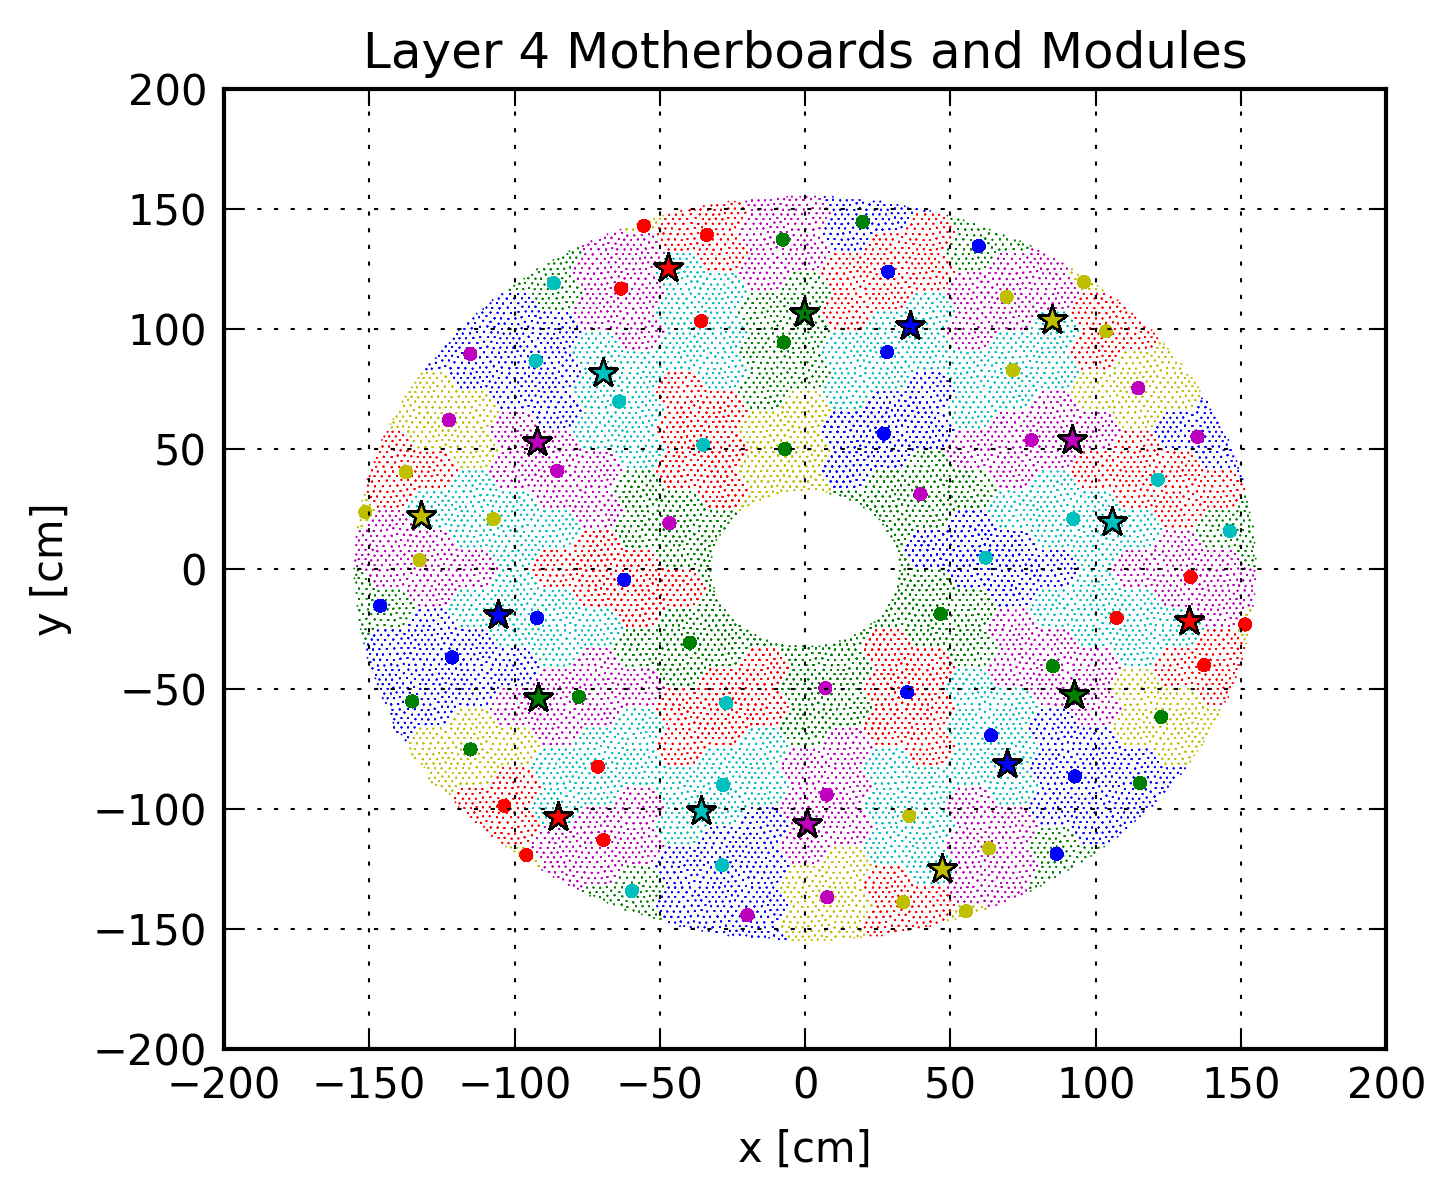

In [6]:
plt.figure(figsize=(5,4))
plt.grid()
plt.xlim(-200,200)
plt.ylim(-200,200)
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')

cycol = cycle('bgrcmy')

mboard_group = geom_map.groupby('mboard_id')

for key in list(mboard_group.groups.keys()):
    this_group = mboard_group.get_group(key)
    mod_group = this_group.groupby('mod_id')
    for subkey in list(mod_group.groups.keys()):
        this_subgroup = mod_group.get_group(subkey)
        plt.scatter(this_subgroup.tc_x, this_subgroup.tc_y, s=0.2, edgecolors="None", color=next(cycol))
    
for key in list(mboard_group.groups.keys()):
    this_group = mboard_group.get_group(key)
    mod_group = this_group.groupby('mod_id')
    modplot = plt.scatter(this_group.mod_x, this_group.mod_y, s=10, edgecolors="None", color=next(cycol))
    plt.scatter(this_group.mboard_x, this_group.mboard_y, marker="*", c=modplot.get_facecolors(), s=50, linewidths=0.5) 

plt.title('Layer 4 Motherboards and Modules')